In [1]:
from google.cloud import bigquery as bq
from google.auth import compute_engine
from pandas.io import gbq
import matplotlib.pyplot as plt

In [20]:
# client = bq.Client()
# dataset_ref = client.dataset('tcga_201607_beta', project='p1rcc-aqua')
# table_ref = dataset_ref.table('mRNA_KIRP')
# table = client.get_table(table_ref)

## Barplot of gene expression across patients

### Insert gene name below

In [110]:
gene_name = "TTN"

In [47]:
# query database
query = 'SELECT * FROM tcga_201607_beta.mRNA_KIRP WHERE HGNC_gene_symbol = "' + gene_name + '"'
df = gbq.read_gbq(query, project_id='p1rcc-aqua')

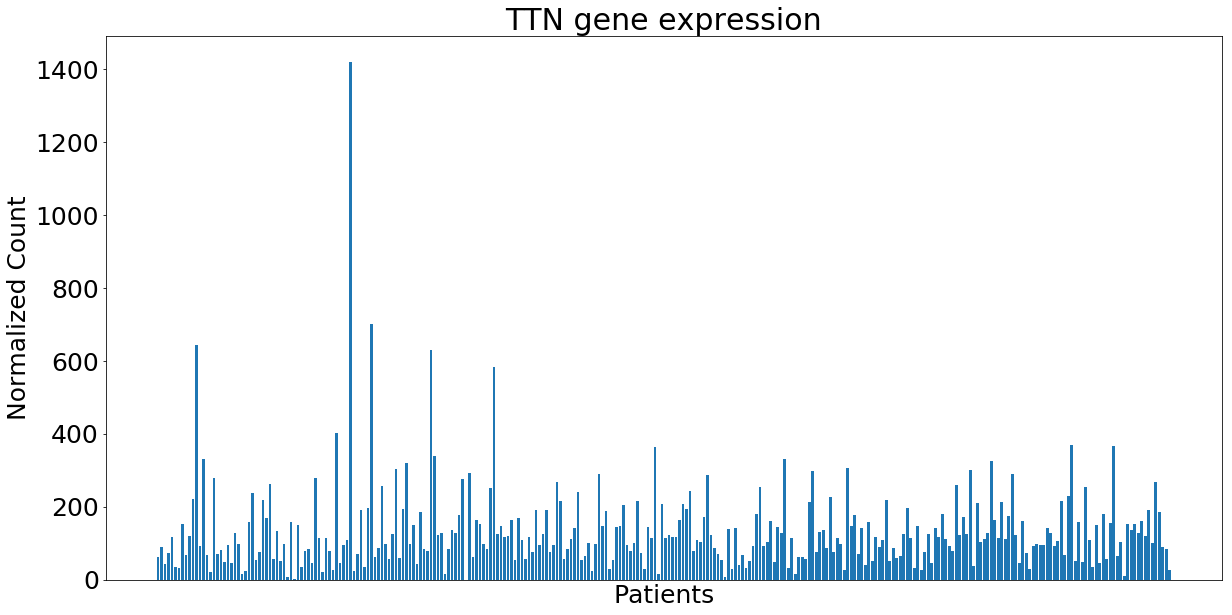

In [70]:
# plot
plt.figure(figsize=(20,10))
ax = plt.subplot() # Defines ax variable by creating an empty plot
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(25)

plt.bar(df['ParticipantBarcode'],df['normalized_count'])
plt.xticks([])
plt.xlabel("Patients")
plt.ylabel("Normalized Count")
ax.set_title(gene_name + " gene expression", fontsize=30)
plt.show()

## Scatter plot to compare gene expressions for 2 genes

### Insert gene names below

In [90]:
gene_name1 = "TTN"
gene_name2 = "MUC4"

In [95]:
query1 = 'SELECT * FROM tcga_201607_beta.mRNA_KIRP WHERE HGNC_gene_symbol = "' + gene_name1 + '"'
df1 = gbq.read_gbq(query1, project_id='p1rcc-aqua')
query2 = 'SELECT * FROM tcga_201607_beta.mRNA_KIRP WHERE HGNC_gene_symbol = "' + gene_name2 + '"'
df2 = gbq.read_gbq(query2, project_id='p1rcc-aqua')

In [96]:
df = df1.merge(df2, left_on="ParticipantBarcode", right_on="ParticipantBarcode", how="left")

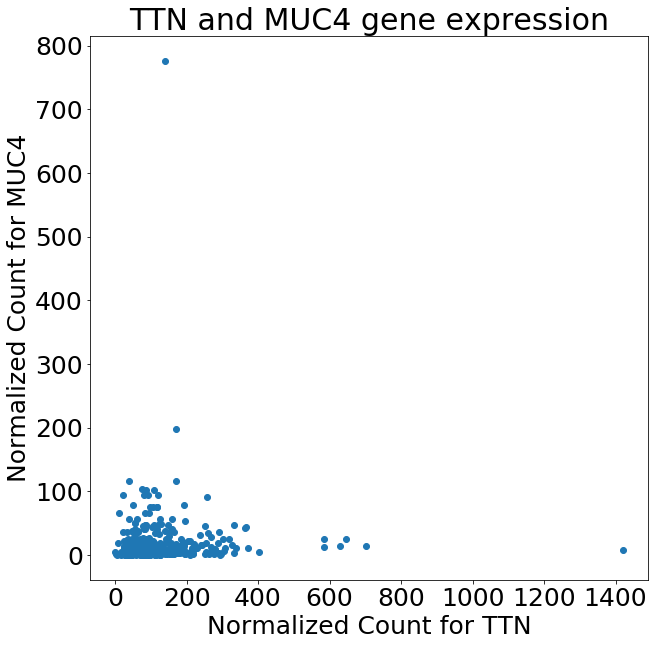

In [111]:
plt.figure(figsize=(10,10))
ax = plt.subplot() # Defines ax variable by creating an empty plot
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(25)
plt.scatter(df['normalized_count_x'],df['normalized_count_y'])
plt.xlabel("Normalized Count for " + gene_name1)
plt.ylabel("Normalized Count for " + gene_name2)
ax.set_title(gene_name1 + " and " + gene_name2 + " gene expression", fontsize=30)
plt.show()

## Scatter plot to compare gene expressions for 2 genes colored by another variable from clinical data table

In [114]:
import pandas as pd
clin_data = pd.read_csv("data1.csv")

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,28,29,34,49,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
clin_data_KIRP = clin_data[clin_data['Study'] == "KIRP"]

In [134]:
clin_data_KIRP.head()

,ParticipantBarcode,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
8003,TCGA-2K-A9WE,KIRP,TCGA,73292C19-D6A8-4BC4-97BC-CCCE54F264F8,2K,53.0,NaN,398,Nationwide Children's Hospital,M0,...,27.7,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
8004,TCGA-2Z-A9JE,KIRP,TCGA,C20B1007-0111-4EF6-9DF5-14DA6094FCA1,2Z,59.0,NaN,432,Nationwide Children's Hospital,M0,...,26.6,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
8005,TCGA-2Z-A9JL,KIRP,TCGA,F9C593D1-F204-4026-8A9B-A6AF0922C885,2Z,47.0,NaN,432,Nationwide Children's Hospital,M0,...,25.6,NaN,NaN,"Yes, History of Synchronous/Bilateral Malignancy",Kidney,"Other, specify",Synchronous Malignancy,2007.0,NaN,NaN
8006,TCGA-2Z-A9JD,KIRP,TCGA,CFF68090-09DF-492B-874C-0CAEB29F9361,2Z,66.0,NaN,432,Nationwide Children's Hospital,M0,...,43.4,NaN,NaN,"Yes, History of Prior Malignancy",Kidney,Clear Cell Adenocarcinoma,Prior Malignancy,1981.0,NaN,1961.0
8007,TCGA-2Z-A9JI,KIRP,TCGA,3ABD0691-F575-44CE-A13E-8F6BCEB8CABF,2Z,38.0,NaN,432,Nationwide Children's Hospital,M0,...,27.7,NaN,NaN,No,NaN,NaN,NaN,2007.0,NaN,1984.0


In [131]:
df_all = df.merge(clin_data_KIRP, left_on="ParticipantBarcode", right_on="ParticipantBarcode", how="left")

In [133]:
df_all.head()

,int64_field_0_x,ParticipantBarcode,SampleBarcode_x,AliquotBarcode_x,Study_x,SampleTypeLetterCode_x,Platform_x,original_gene_symbol_x,HGNC_gene_symbol_x,gene_id_x,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
0,450786,TCGA-BQ-5879,TCGA-BQ-5879-11A,TCGA-BQ-5879-11A-01R-1592-07,KIRP,NT,IlluminaHiSeq,TTN,TTN,7273,...,33.8,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
1,450786,TCGA-BQ-5879,TCGA-BQ-5879-11A,TCGA-BQ-5879-11A-01R-1592-07,KIRP,NT,IlluminaHiSeq,TTN,TTN,7273,...,33.8,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
2,589608,TCGA-BQ-5890,TCGA-BQ-5890-11A,TCGA-BQ-5890-11A-01R-1592-07,KIRP,NT,IlluminaHiSeq,TTN,TTN,7273,...,25.8,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
3,589608,TCGA-BQ-5890,TCGA-BQ-5890-11A,TCGA-BQ-5890-11A-01R-1592-07,KIRP,NT,IlluminaHiSeq,TTN,TTN,7273,...,25.8,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
4,4368750,TCGA-BQ-7044,TCGA-BQ-7044-11A,TCGA-BQ-7044-11A-01R-1965-07,KIRP,NT,IlluminaHiSeq,TTN,TTN,7273,...,28.3,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


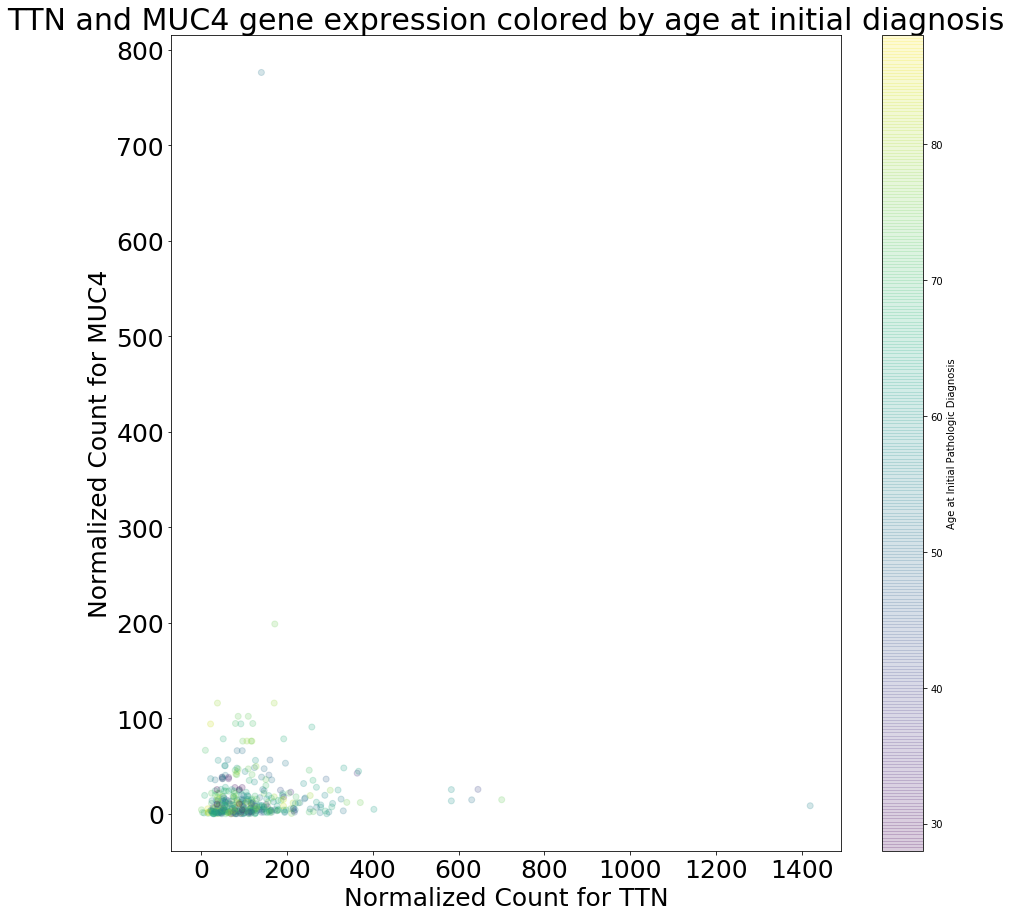

In [145]:
plt.figure(figsize=(15,15))
ax = plt.subplot() # Defines ax variable by creating an empty plot
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(25)
plt.scatter(df_all['normalized_count_x'],df_all['normalized_count_y'], c=df_all['age_at_initial_pathologic_diagnosis'], alpha=0.2)
plt.xlabel("Normalized Count for " + gene_name1)
plt.ylabel("Normalized Count for " + gene_name2)
cbar=plt.colorbar()
cbar.set_label("Age at Initial Pathologic Diagnosis")
ax.set_title(gene_name1 + " and " + gene_name2 + " gene expression colored by age at initial diagnosis", fontsize=30)
plt.show()